In [43]:
from pioneer.das.api.platform import Platform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams["figure.figsize"] = (10,10)
#%matplotlib notebook

In [2]:
#Import a dataset
pf = Platform('/nas/pixset/exportedDataset/20200610_185206_rec_dataset_downtown05_exported')


Loading sensors: 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]


In [3]:
# A platform is composed in sensors with the following naming convention 'typeOfSensor_position'.
# Letter signification for position accronyms: b=bottom, f=front, c=center, r=right and l=left
list(pf.sensors)


['peakcan_fcc',
 'pixell_bfc',
 'flir_bfr',
 'flir_bfc',
 'flir_bfl',
 'flir_bbfc',
 'ouster64_bfc',
 'sbgekinox_bcc',
 'radarTI_bfc']

In [4]:
#Get Pixell sensor 
pixell = pf.sensors['pixell_bfc']

#Find the Pixell recorded data available are the following 
pixell.keys()

dict_keys(['sta', 'cfg', 'ftrr', 'ech', 'box3d-deepen', 'xyzit-voxmap', 'ech-ftrr'])

In [5]:
#Get Pixell's echoes (detections)
echoes = pixell['ech']

In [6]:
#Get Pixell's echoes (detections with distancesm aplitudes, timestamps and flags) for a specific frame
frame=10
echoes[frame].raw


{'amplitude_scale': 16,
 'das.sample': <pioneer.das.api.samples.echo.Echo at 0x7f3c4affff28>,
 'data': array([( 95, 4.3082275, 131.375 , 1591815129524940, 193),
        ( 95, 0.       ,   0.    , 1591815129524940, 128),
        ( 95, 0.       ,   0.    , 1591815129524940, 128), ...,
        (672, 2.97937  , 113.5625, 1591815129523508, 129),
        ( 95, 0.       ,   0.    , 1591815129524940, 128),
        ( 95, 0.       ,   0.    , 1591815129524940, 128)],
       dtype=[('indices', '<u4'), ('distances', '<f4'), ('amplitudes', '<f4'), ('timestamps', '<u8'), ('flags', '<u2')]),
 'distance_scale': 65536,
 'h': 96,
 'h_fov': 180.60386657714844,
 'led_power': 0,
 'scan_direction': 0,
 'timestamp': 1591815129487396,
 'v': 8,
 'v_fov': 16.072763442993164}

In [7]:
#Use the function point_cloud() to read the XYZ coordinates of each detections
frame=0
echoes[frame].point_cloud()
x=echoes[frame].point_cloud()[:,0]
y=echoes[frame].point_cloud()[:,1]
z=echoes[frame].point_cloud()[:,2]

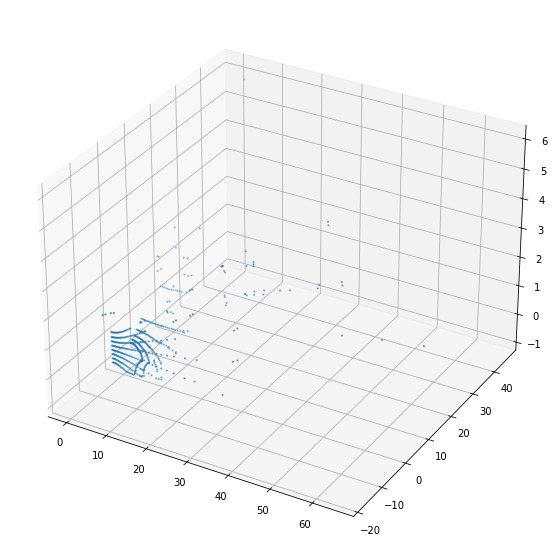

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, s=1)

In [9]:
#Read Pixell fullwave form data for one pixell
traces = pixell['ftrr']


In [10]:
#Traces are acquired at two gain 'low' and 'high'
traces[frame].raw

{'high': {'data': array([[ 532,  532,  532, ...,    4,   28,   55],
         [  16,   16,   16, ...,   39,   24,    0],
         [-706, -706, -706, ..., -698, -717, -707],
         ...,
         [-611, -611, -611, ..., -622, -608, -630],
         [-547, -547, -547, ..., -578, -609, -582],
         [ 159,  159,  159, ...,  159,  169,  178]], dtype=int16),
  'distance_scaling': 0.18737028625,
  'frame_id': 3665807,
  'scan_direction': 0,
  'start_index': 0,
  'time_base_delays': array([-22.70398 , -22.70488 , -22.675919, -22.670105, -22.665726,
         -22.668793, -22.656036, -22.646484, -22.625015, -22.631622,
         -22.65567 , -22.653183, -22.625366, -22.632324, -22.625885,
         -22.625168, -22.620132, -22.622314, -22.627487, -22.62416 ,
         -22.621658, -22.62738 , -22.627502, -22.619095, -22.628738,
         -22.638199, -22.632874, -22.629227, -22.656433, -22.661789,
         -22.654602, -22.658096, -22.780579, -22.77716 , -22.76001 ,
         -22.754395, -22.737778, -22.

In [11]:
#Read high gain traces
traces[frame].raw['high']['data']

array([[ 532,  532,  532, ...,    4,   28,   55],
       [  16,   16,   16, ...,   39,   24,    0],
       [-706, -706, -706, ..., -698, -717, -707],
       ...,
       [-611, -611, -611, ..., -622, -608, -630],
       [-547, -547, -547, ..., -578, -609, -582],
       [ 159,  159,  159, ...,  159,  169,  178]], dtype=int16)

In [12]:
#Read low gain traces
traces[frame].raw['low']['data']

array([[ -773,  -773,  -773, ...,  -795,  -790,  -802],
       [ -716,  -716,  -716, ...,  -708,  -733,  -733],
       [-1263, -1263, -1263, ..., -1302, -1283, -1290],
       ...,
       [-1247, -1247, -1247, ..., -1271, -1265, -1262],
       [-1359, -1359, -1359, ..., -1365, -1374, -1365],
       [-1498, -1498, -1498, ..., -1495, -1493, -1486]], dtype=int16)

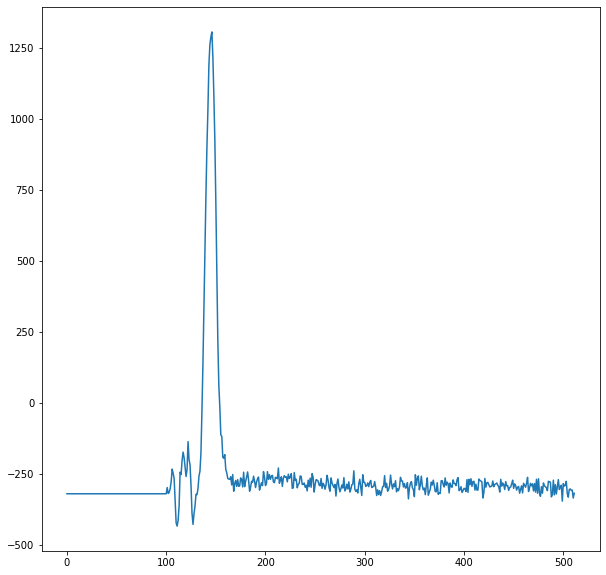

In [45]:
#Plot traces from frame and channelIndex=757 (a pixell is composed of 8*96=768 channels)
channelIndex=750
plt.plot(traces[frame].raw['high']['data'][channelIndex,:])

In [46]:
#Get a camera sensor
camera_bbfc = pf.sensors['flir_bbfc']

In [47]:
#Read image from camera
camera_bbfc.keys()

dict_keys(['flimg', 'box2d-detectron-undistort', 'poly2d-detectron-undistort'])

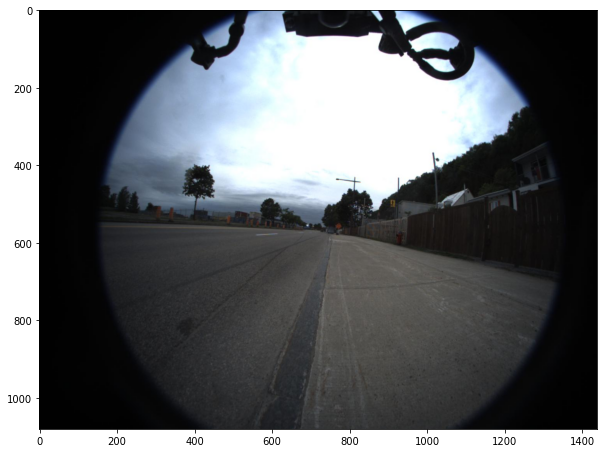

In [48]:
#Plot camera image from
plt.imshow(camera_bbfc['flimg'][frame].raw)

In [49]:
#Synchronize pixell echoes/traces and flir camera images datasources
sync = pf.synchronized(sync_labels=['flir_bbfc_flimg','pixell_bfc_ech','pixell_bfc_ftrr'], tolerance_us=1000e3)


Synchronizing: 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]


In [50]:
#A 123 synchronized platform is a collection of datasources (vs standard platform which is a collection of sensors containing data sources)
sync.sync_labels

['flir_bbfc_flimg', 'pixell_bfc_ech', 'pixell_bfc_ftrr']

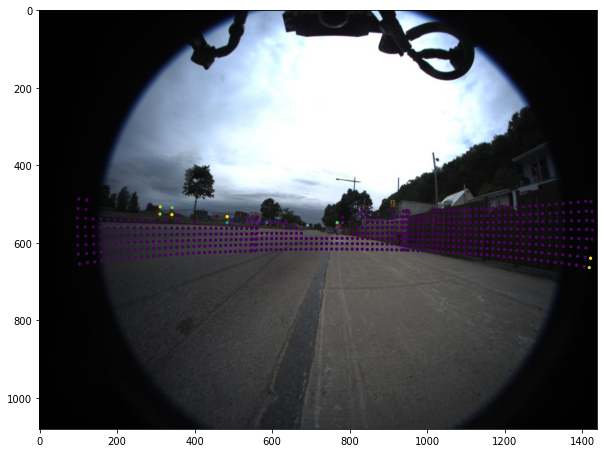

In [51]:
### Draw new camera image ###
image_sample = sync[frame]['flir_bbfc_flimg']
image = image_sample.raw
plt.imshow(image)

### Get point cloud in the camera referential ###
echoes_sample = sync[frame]['pixell_bfc_ech']
point_cloud = echoes_sample.point_cloud(referential = 'flir_bbfc')

### Project points in 2D image coordinates ###
pts2d = image_sample.project_pts(point_cloud)

### Draw projected points ###
keep = np.where((pts2d[:,0] > 0) & (pts2d[:,0] < image.shape[1]-1) & (pts2d[:,1] > 0) & (pts2d[:,1] < image.shape[0]-1))[0]

if len(keep) > 0:
    plt.scatter(pts2d[keep,0], pts2d[keep,1], c=echoes_sample.amplitudes[keep], s=5)